<Axes: >

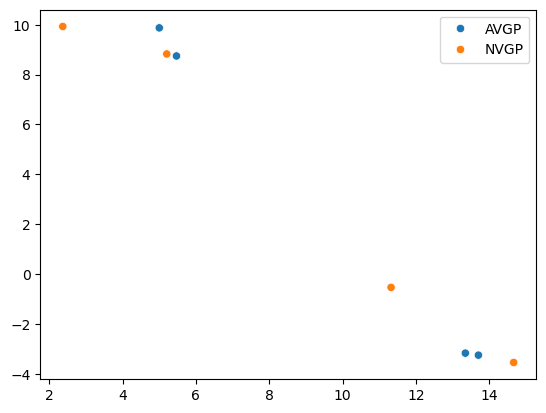

In [21]:
%reload_ext autoreload
%autoreload 2

from umap import UMAP
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from src.acnets.pipeline import (
    Parcellation, ConnectivityPipeline, ConnectivityVectorizer)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# DATA
subjects = (Parcellation(atlas_name='dosenbach2010')
     .fit_transform(None).coords['subject'].values)

y_encoder = LabelEncoder()
y = y_encoder.fit_transform([s[:4] for s in subjects])

preproc  = Pipeline([
    ('connectivity', ConnectivityPipeline(kind='partial correlation',
                                          connectivity_aggregation='network')),
    ('vectorize', ConnectivityVectorizer()),
    ('scale', StandardScaler()),
    ('zerovar', VarianceThreshold()),
    # ('clf', SVC(kernel='linear', C=1))
])

X = preproc.fit_transform(subjects)

cv = StratifiedShuffleSplit(n_splits=2, test_size=0.25)
splits = list(cv.split(X, y))
train, test = splits[0]

estimator = UMAP(n_neighbors=8)

umap_coefs = estimator.fit(X, y).transform(X)
group = [s[:4] for s in subjects]

umap_coefs = estimator.fit(X[train], y[train]).transform(X[test])
group = [s[:4] for s in subjects[test]]

sns.scatterplot(x=umap_coefs[:, 0], y=umap_coefs[:, 1], hue=group)

# sns.scatterplot(data=results, x='group', y='umap_coef', hue='group')
# plt.hlines(0, 0, 1, color='gray', linestyle='--')